<a href="https://colab.research.google.com/github/ImHarshhh/Dog-Vision/blob/main/Dog_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


🐶 End to End Multi-Class Dog Breed Classification

---
1.Problem

2.Data

3.Evaluation

4.Features



In [4]:
# Import Tensor FLow

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:",tf.__version__)
print("TF_HUb:",hub.__version__)



#Checking GPU availability

print("GPU","available" if tf.config.list_physical_devices("GPU") else " not available :(" )



TF version: 2.12.0
TF_HUb: 0.13.0
GPU available


#### Converting Data into Tensors(Numerical Representation)

In [6]:
import pandas as pd
labels_csv =pd.read_csv("/content/drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [7]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [8]:
# How many images are there per breed
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

<Axes: >

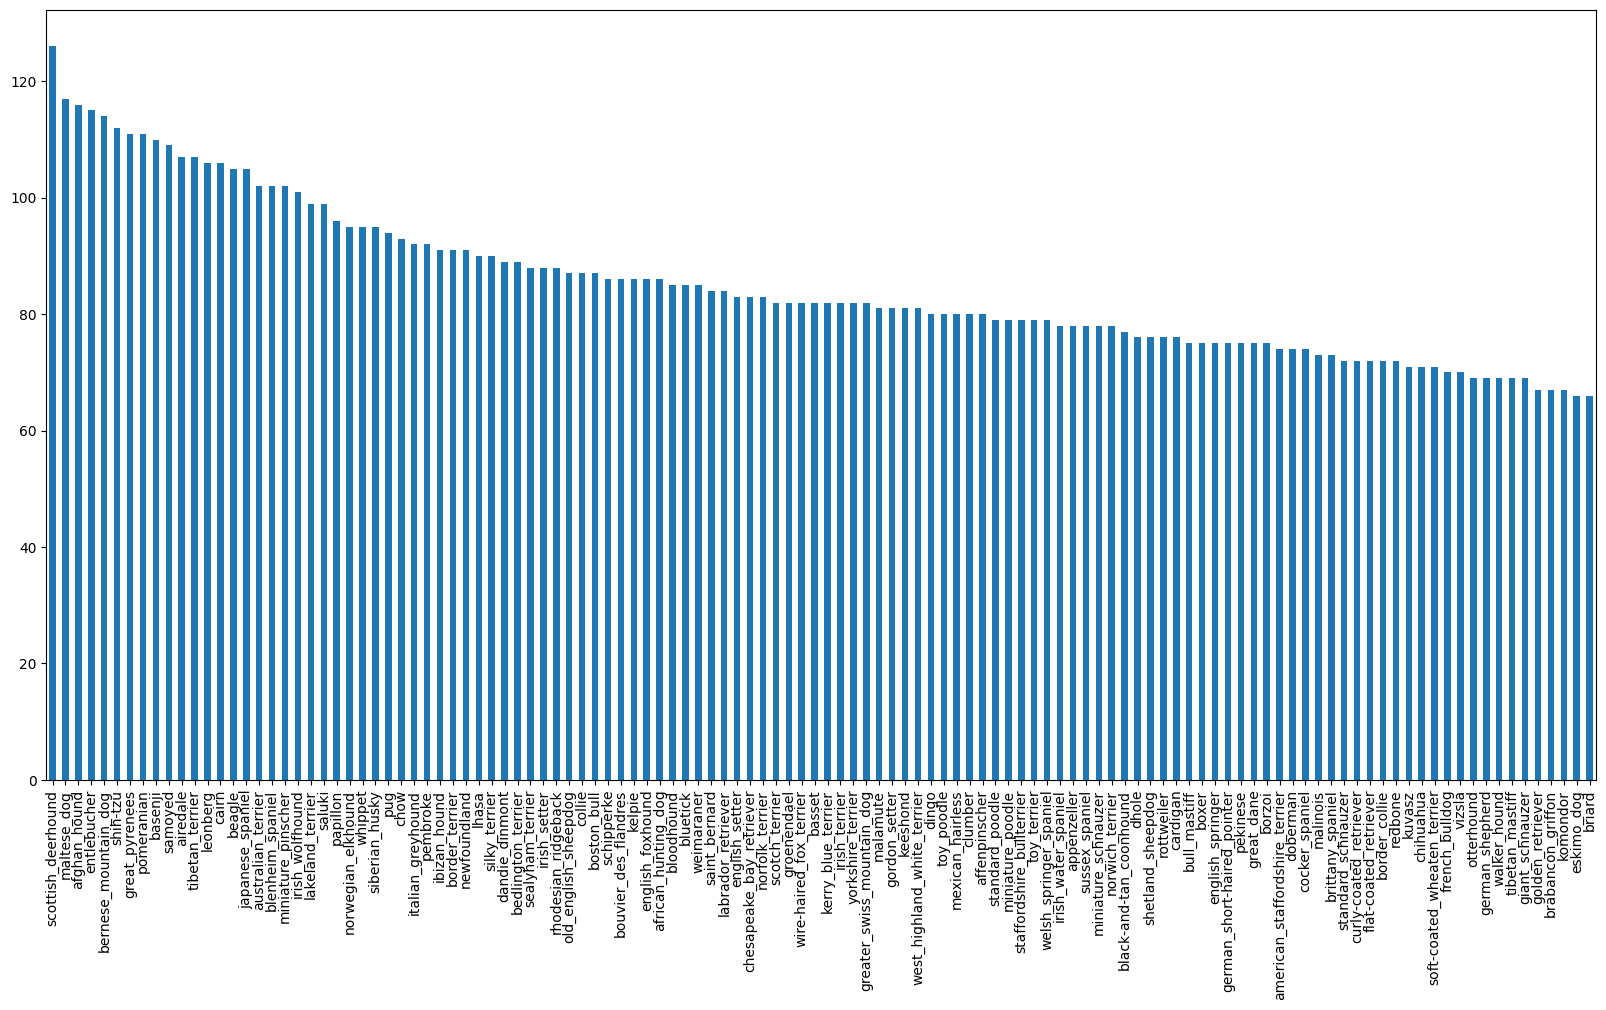

In [9]:
# How many images are there per breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [10]:
labels_csv["breed"].value_counts().median()

82.0

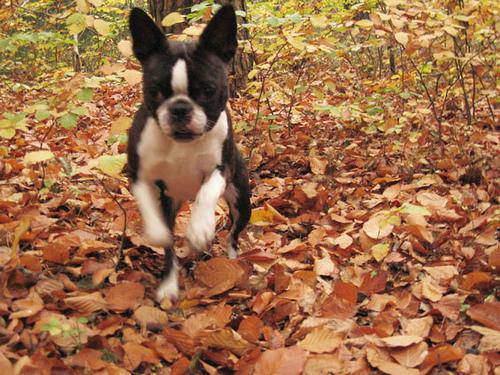

In [11]:
from IPython.display import Image,display
display(Image("drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg"))



---



In [12]:

labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [14]:
# Create pathnames from image
filename = [ "drive/My Drive/Dog Vision/train/"+fname +".jpg" for fname in labels_csv["id"]]

filename

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/My Drive/Dog Vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/My Drive/Dog Vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/My Drive/Dog Vision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/My Drive/Dog Vision/train/006cc3ddb9dc1bd82

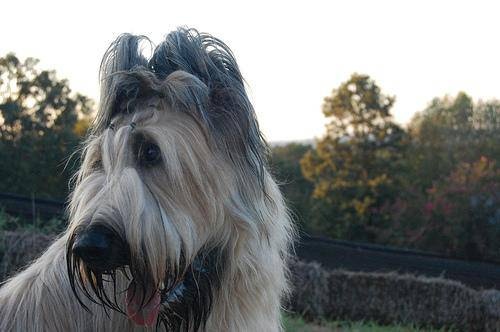

In [15]:
Image(filename[9050])

In [16]:
labels_csv["breed"][9050]

'briard'

In [17]:
#Creating Labels

import numpy as np

labels=labels_csv["breed"]


In [18]:
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [19]:
len(labels)

10222

In [20]:
# Checking if theres missing data
if len(labels) == len(filename):
  print("No missing data")

No missing data


In [21]:
unique_breeds= np.unique(labels)
unique_breeds

len(unique_breeds)


120

In [22]:
#Turn label into booleans

boolean_labels= [label== unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [23]:
#Converting the above true and false array into integers

print(labels[0])
print(boolean_labels[0].astype(int))

boston_bull
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [24]:
### Creating our own Validation Set
x= filename
y=boolean_labels

# We are starting with 1000 smaple then we will increase the datasets

NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1}

In [25]:
# Train and Test Sets

from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

len(x_train),len(x_val),len(y_train),len(y_val)


(800, 200, 800, 200)

In [26]:
x_train[:2]

['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
 'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg']

In [27]:
y_train[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [28]:
#Preprocessing Images into Tensors

In [29]:
#Comvert image to NumPy Array

from matplotlib.pyplot import imread
image = imread(filename[42])
image.shape

(257, 350, 3)

In [30]:
# Turn image into Tensor   colors in RGB
tf.constant(image)[:2]


<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

## Function for Preprocessing


In [31]:
# Define IMAGE shape
IMG_SIZE = 224

# Create a function for preprocessing

def process_image(image_path,img_size=IMG_SIZE):

  image = tf.io.read_file(image_path)   # Reading file as tensors
  image = tf.image.decode_jpeg(image,channels=3)   # Converting images into Tensors in RGB colors
  image = tf.image.convert_image_dtype(image,tf.float32)   # Converting 0-255 to  0-1 coz of normalization
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])  # Resizing the image in same size

  return image

## Turning our Data into Batches

In [32]:
# COnverting into tuple of image and label

def get_image_label(image_path, label):
  image = process_image(image_path)
  return image,label

In [33]:
process_image(x[42],tf.constant(y[42]))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117757],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

Turning data into tuple of Tensors

In [34]:
# Define Batch SIze

BATCH_SIZE = 32

# Creating a function to convert data into batches
def create_data_batches(x,y=None , batch_size =BATCH_SIZE , valid_data=False , test_data=False):
  if test_data:
    print("Creating test data batches ....")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)

    return data_batch

  elif valid_data:
    print("Creating validation data batches ....")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

    return data_batch

  else:
    print("Creating train data batches ....")

    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data = data.shuffle(buffer_size = len(x))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)


  return data_batch





In [35]:
# Creating training and validation data batches

train_data = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val,y_val,valid_data = True)

Creating train data batches ....
Creating validation data batches ....


In [36]:
# Checking out different attribute
train_data.element_spec , val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [37]:
import matplotlib.pyplot as plt

def show_25_images(images ,labels):

  plt.figure(figsize=(10,10))

  for i in range(25):

    ax = plt.subplot(5,5,i+1)

    plt.imshow(images[i])

    plt.title(unique_breeds[labels[i].argmax()])

    plt.axis("Off")




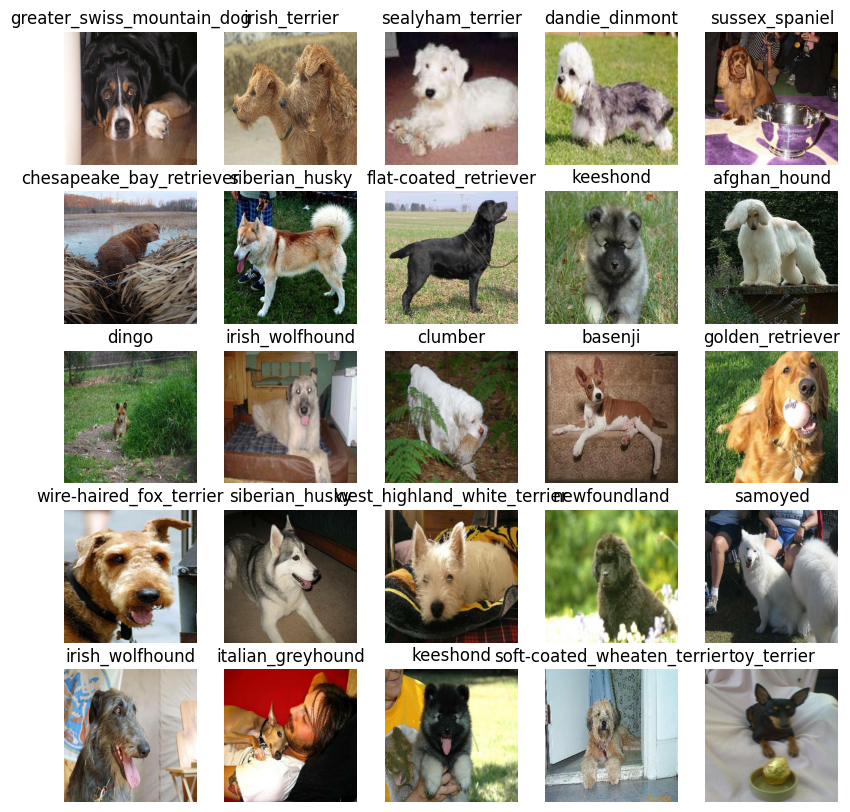

In [38]:
train_images,train_labels = next(train_data.as_numpy_iterator())

show_25_images(train_images , train_labels)



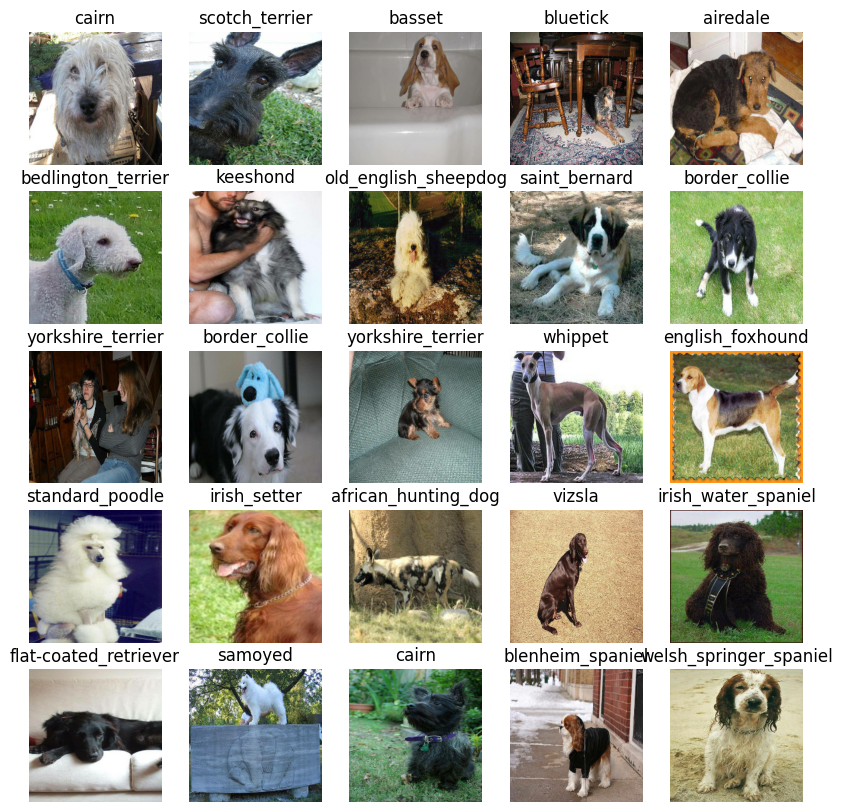

In [39]:
# Now let's visualize validation set

val_images,val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images , val_labels)



# Building a Model

In [40]:
#Setup input Shape

INPUT_SHAPE = [None , IMG_SIZE , IMG_SIZE , 3]

OUTPUT_SHAPE = len(unique_breeds)

#Setup model URL TensorFLow HUB

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

###Keras Deep Learning Model

In [41]:
# Create a function which builds Keras Model

def create_model(input_shape= INPUT_SHAPE,output_shape= OUTPUT_SHAPE , model_url = MODEL_URL):
  print("Building modelr with:",MODEL_URL)

  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(units = OUTPUT_SHAPE, activation="softmax")
  ])

  # Compiling the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # Building a Model
  model.build(INPUT_SHAPE)

  return model



In [42]:
model = create_model()
model.summary()

Building modelr with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Call BAcks
* Checks progress
* Saves Progress
* Stop when there is no improvement in model


### TensorBoaard Callback ( Track Models Progress)

In [43]:
# load tensorboard callback

%load_ext tensorboard

In [44]:
import datetime
import os

# Create a function to build a TensorBoard CallBack

def create_tensorboard_callback():

  # Create a log directory

  logdir = os.path.join("drive/My Drive/Dog Vision/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)




### Early Stoppiing CallBAck (Stops model from overfitting when our Model is not Improving)

In [45]:
# Create early stopping callbacks

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

## Training A Model (on Subset of Data)

In [46]:
# Epochs is basically the number of times the model looks at the training data before validating or testing the model

NUM_EPOCHS = 100 #@param {type:"slider",min:10,max:100,step:10}



## Create a function to train a model


In [47]:
def train_model():

  # Create model

  model = create_model()

  # Create new TensorBoard session everytime we train a model

  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passinf it the callbacks we created

  model.fit(x=train_data , epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard , early_stopping])

  # Return the fitted model

  return model





In [48]:
# Fit the model to the data

model = train_model()

Building modelr with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 18s 205ms/step - loss: 4.6478 - accuracy: 0.0887 - val_loss: 3.4870 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 3s 120ms/step - loss: 1.6511 - accuracy: 0.6812 - val_loss: 2.2208 - val_accuracy: 0.5200
Epoch 3/100
25/25 [==============================] - 3s 118ms/step - loss: 0.5750 - accuracy: 0.9425 - val_loss: 1.7675 - val_accuracy: 0.5800
Epoch 4/100
25/25 [==============================] - 3s 118ms/step - loss: 0.2575 - accuracy: 0.9837 - val_loss: 1.5807 - val_accuracy: 0.6450
Epoch 5/100
25/25 [==============================] - 4s 142ms/step - loss: 0.1493 - accuracy: 0.9962 - val_loss: 1.5185 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 3s 119ms/step - loss: 0.1014 - accuracy: 1.0000 - val_loss: 1.4669 - val_accuracy: 0.6600
Epoch 7/100
25/25 [============================

In [49]:

# Checking the TensorBoard logs

%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

## Making and Evaluating Prediction

In [50]:
 # Make prediction on validation set ( practice exams)

 predictions = model.predict(val_data , verbose=1)
 predictions

7/7 [==============================] - 3s 91ms/step


array([[3.6182818e-03, 7.2338240e-04, 3.0772190e-03, ..., 6.3524079e-05,
        2.1614544e-05, 6.5050535e-03],
       [1.6626626e-02, 2.0514294e-03, 5.4993834e-03, ..., 2.4020960e-04,
        1.4132727e-03, 1.5202418e-04],
       [1.5563126e-05, 9.9426499e-05, 8.5972997e-06, ..., 1.5674374e-04,
        7.3503827e-05, 5.2001444e-04],
       ...,
       [4.9067597e-07, 8.3230052e-06, 4.9946793e-05, ..., 4.6047494e-06,
        1.3546093e-05, 9.7529128e-06],
       [1.1297071e-02, 3.3721095e-04, 3.9563296e-04, ..., 1.3408427e-04,
        5.3605760e-05, 6.7794677e-03],
       [2.5255718e-05, 7.4557967e-05, 1.5643245e-04, ..., 1.5067862e-03,
        3.7281759e-04, 3.2634678e-05]], dtype=float32)

In [51]:
predictions.shape

(200, 120)

In [52]:
np.max(predictions[0])

0.254352

In [53]:
index = 43
print(predictions[0])
print(f"Max value ( probabilty of prediction ) : {np.max(predictions[index])}")
print(f"Sum : {np.sum(predictions[index])}")
print(f"Max index : {np.argmax(predictions[index])}")
print(f"Predicted label : {unique_breeds[np.argmax(predictions[index])]}")




[3.61828180e-03 7.23382400e-04 3.07721901e-03 3.87186665e-05
 1.67472067e-03 3.58114739e-05 1.24782100e-02 2.44968920e-03
 1.64242185e-04 3.62999132e-03 2.88940675e-04 3.16027465e-04
 2.05490476e-04 6.59806174e-05 1.91671948e-03 6.15496596e-04
 8.06214739e-05 8.93024653e-02 1.33041816e-04 1.40666976e-04
 5.04913682e-04 6.18451159e-05 2.20038255e-05 2.91285897e-03
 5.35286636e-05 3.37672682e-04 2.54352003e-01 8.30163190e-05
 3.53341107e-03 2.29998885e-04 1.08443690e-03 1.50481984e-03
 3.09765281e-04 2.20373222e-05 1.36344956e-04 7.20890909e-02
 3.92023867e-05 6.54232397e-04 4.33287023e-05 7.82782590e-05
 9.51462775e-04 1.39931479e-04 2.30796373e-04 1.90029969e-04
 1.42917197e-04 2.29740297e-04 6.93407055e-05 1.65088990e-04
 2.04996846e-04 4.77389549e-05 2.26739066e-04 1.99058159e-05
 5.04677999e-04 1.25561695e-04 1.78278700e-04 7.24077036e-05
 1.28314816e-04 1.65204750e-03 3.58596124e-04 2.35205069e-01
 1.62106226e-04 1.86757061e-05 4.80874255e-03 6.90828238e-05
 1.10862148e-03 2.247403

### Prediction Probabilities into respective Labels

In [54]:
def get_pred_label(prediction_probabilities,n):


  return unique_breeds[np.argmax(predictions[n])]



In [55]:
pred_label = get_pred_label(predictions[33],n=33)
pred_label

'cairn'

#### Unbatch the batched Dataset

In [56]:
#Create a function to unbatch a data set

def unbatchify(data):
  images = []
  labels = []
  #Loop through unbatched data
  for image,label in val_data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images , labels



# Unbatchify the validation data
val_images , val_labels = unbatchify(val_data)
val_images[0] ,val_labels[0]


(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

### Visualising our Prediction

In [57]:
def plot_pred (predictions_probabilities,images,labels,n):
  pred_prob,true_label,image = predictions_probabilities[n],labels[n],images[n]

  # Get pred label
  pred_label = get_pred_label(pred_prob,n)


  # PLot image and remove the ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Colour
  if pred_label == true_label :
    color = "green"

  else:
    color = "red"

  # Change plot title as predicted label , probability and truth label

  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label,
                                    ),color=color)




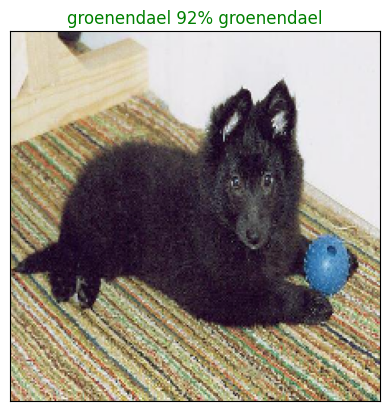

In [58]:
plot_pred(predictions_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

#### Visualising the predictions ( top 10 )

In [59]:
def plot_pred_conf(predictions_probabilities , labels , n=1):

  pred_prob,true_label = predictions_probabilities[n],labels[n]

  # Get predicted label

  pred_label = get_pred_label(pred_prob , n)

  # Find top 10 predictions indexes

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction values

  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find top 10 prediction labels

  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Ploting

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
                     labels = top_10_pred_labels,
                     rotation ="vertical")

  if np.isin(true_label , top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")

  else:
    pass





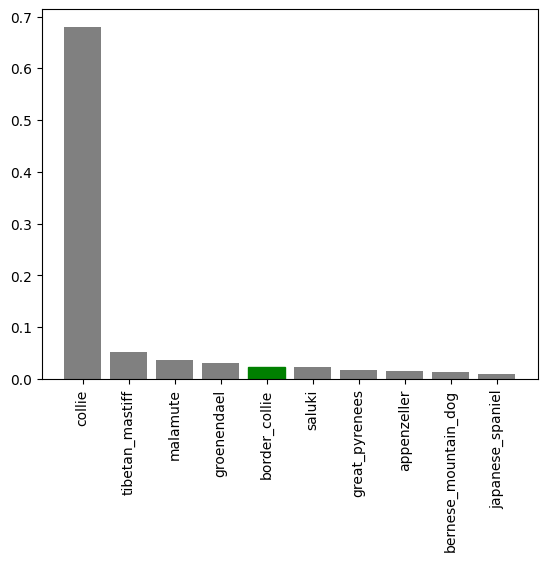

In [60]:
plot_pred_conf(predictions_probabilities=predictions,
               labels = val_labels,
               n=9
               )

### Visualising the prediction is more detailed manner

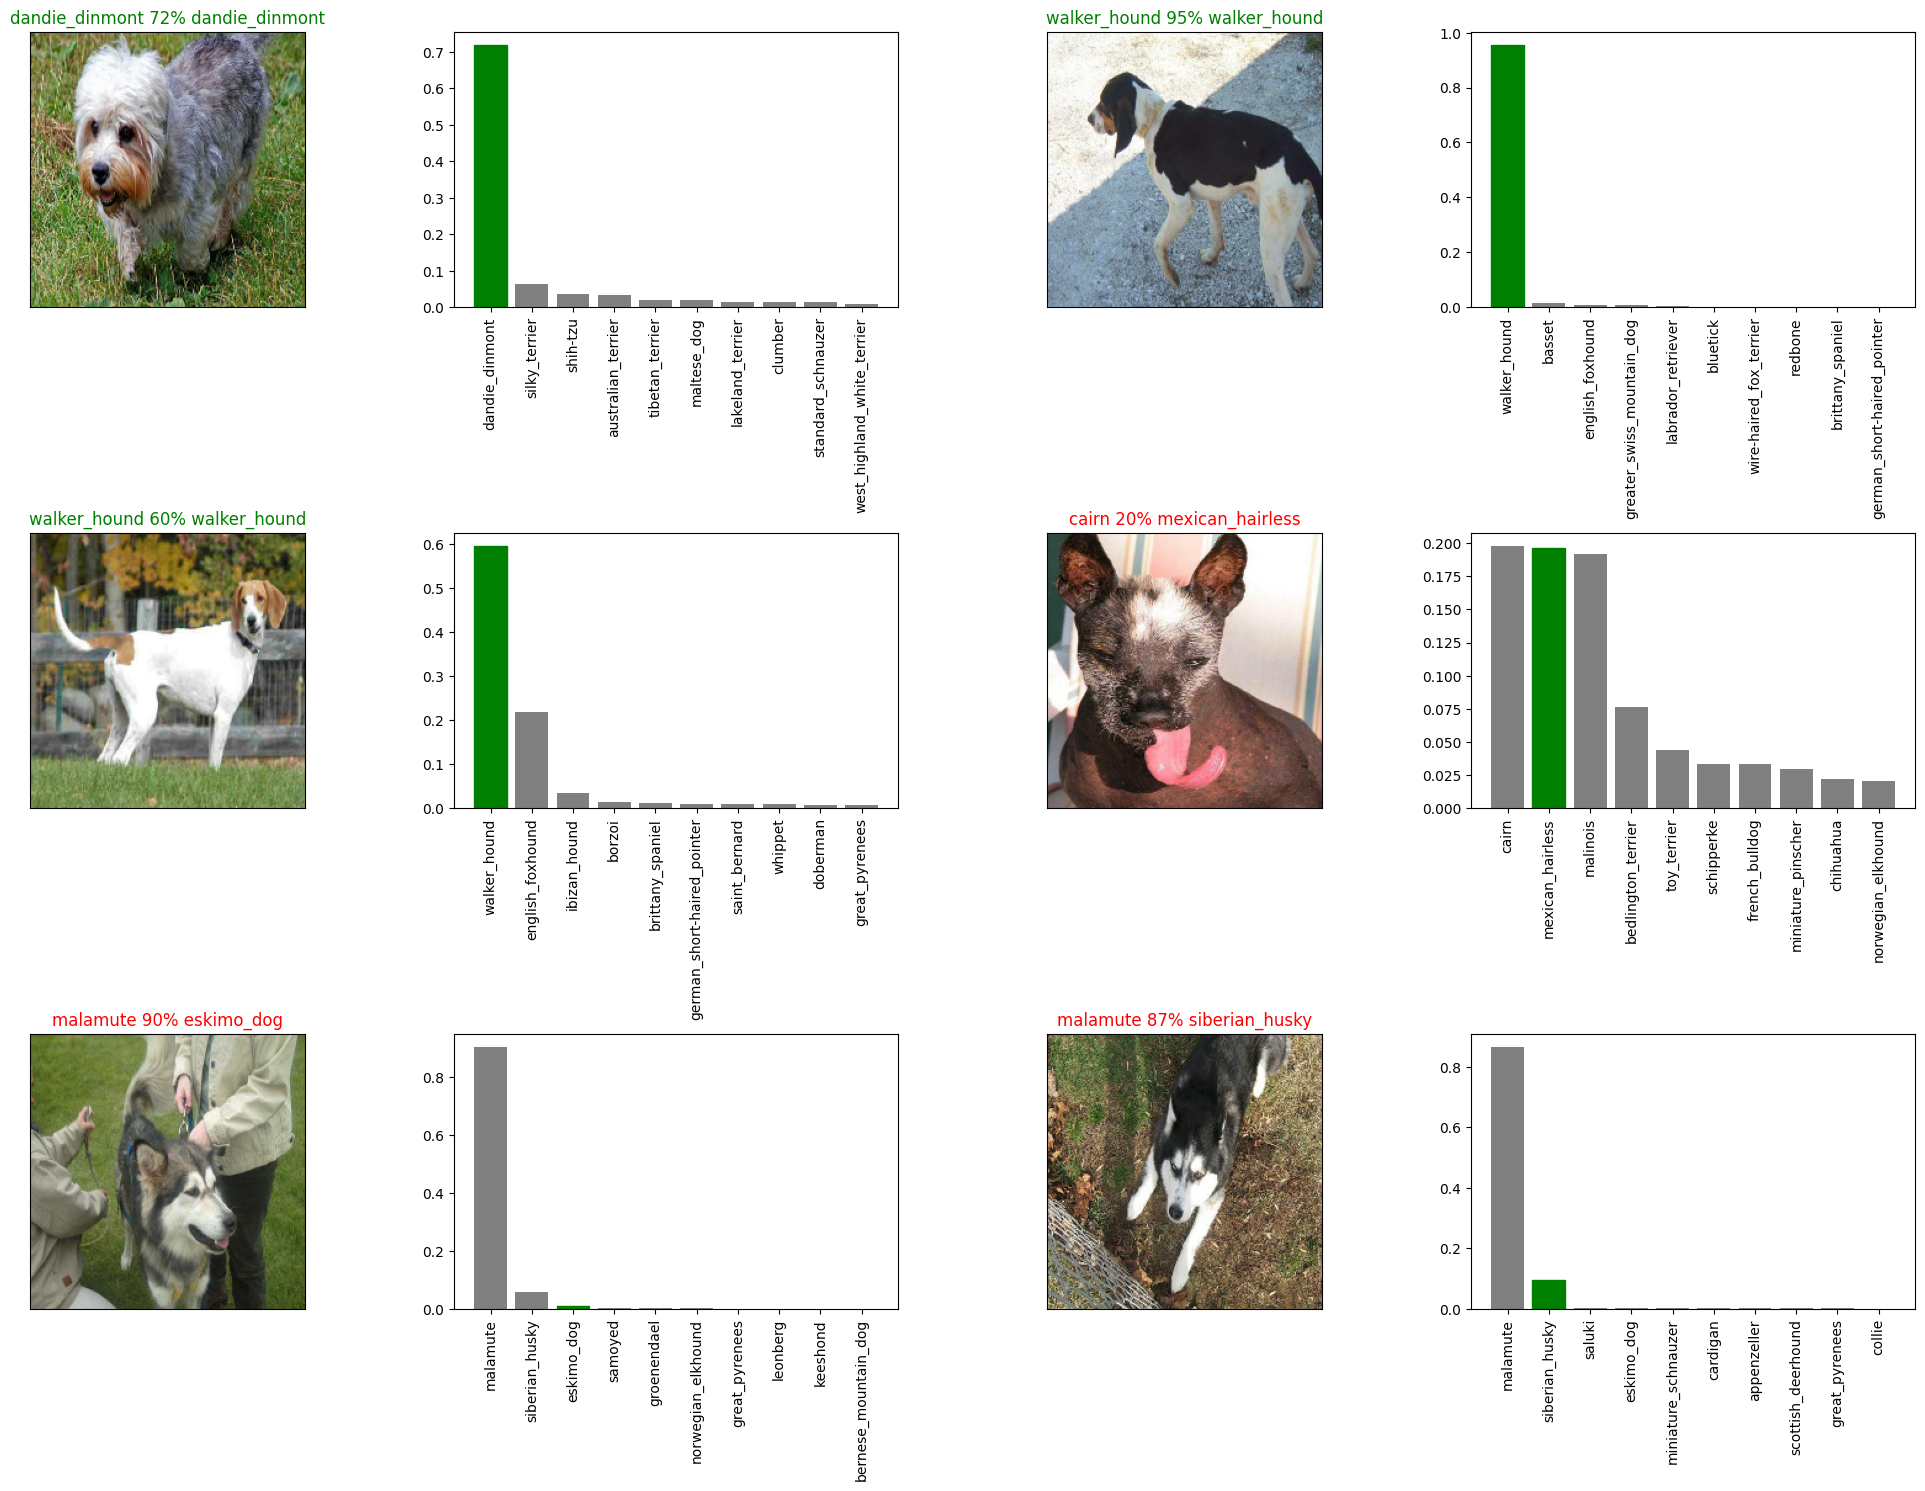

In [61]:
# Check top predictions with their images

i_multiplier = 30
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols

plt.figure(figsize=(10*num_cols , 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows , 2*num_cols , 2*i+1)
  plot_pred(predictions_probabilities= predictions,
            labels = val_labels,
            images = val_images,
            n = i+i_multiplier)
  plt.subplot(num_rows , 2*num_cols , 2*i+2)
  plot_pred_conf(predictions_probabilities= predictions,
                 labels = val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad = 1.0)
plt.show()

### Saving Our Model

In [62]:
# Dreatinf a fucntion to save a model

def save_model(model, suffix =None):

  # Create a modeldirectory pathname with current time

  modeldir = os.path.join("drive/My Drive/Dog Vision/models",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "=" + suffix + ".h5"  # format of saving model
  print(f"SAving model to : {model_path}.....")
  model.save(model_path)
  return model_path

In [63]:
def load_model(model_path):

  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {"KerasLayer":hub.KerasLayer})
  return model

In [64]:
# Save our model for 1000 images

save_model(model,suffix="1000-images-mobilnetV2-Adam-p3")

SAving model to : drive/My Drive/Dog Vision/models/20230623-154203=1000-images-mobilnetV2-Adam-p3.h5.....


'drive/My Drive/Dog Vision/models/20230623-154203=1000-images-mobilnetV2-Adam-p3.h5'

In [65]:
# Loading trained Model

loaded_1000_image_model = load_model("drive/My Drive/Dog Vision/models/20230623-154203=1000-images-mobilnetV2-Adam-p3.h5")

Loading saved model from: drive/My Drive/Dog Vision/models/20230623-154203=1000-images-mobilnetV2-Adam-p3.h5


In [66]:
# Evaluate the pre-save model
model.evaluate(val_data)

7/7 [==============================] - 1s 87ms/step - loss: 1.3221 - accuracy: 0.6900


[1.3221031427383423, 0.6899999976158142]

In [67]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 88ms/step - loss: 1.3221 - accuracy: 0.6900


[1.3221031427383423, 0.6899999976158142]

In [68]:
full_data = create_data_batches(x,y)


Creating train data batches ....


In [69]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [70]:
full_model = create_model()

Building modelr with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [71]:
# CallBacks
full_model_tensorboard = create_tensorboard_callback()

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",
                                                             patience = 3)



In [72]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks = [full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 38s 105ms/step - loss: 1.3358 - accuracy: 0.6714
Epoch 2/100
320/320 [==============================] - 33s 103ms/step - loss: 0.4004 - accuracy: 0.8806
Epoch 3/100
320/320 [==============================] - 33s 102ms/step - loss: 0.2378 - accuracy: 0.9347
Epoch 4/100
320/320 [==============================] - 33s 103ms/step - loss: 0.1536 - accuracy: 0.9632
Epoch 5/100
320/320 [==============================] - 33s 103ms/step - loss: 0.1033 - accuracy: 0.9797
Epoch 6/100
320/320 [==============================] - 34s 106ms/step - loss: 0.0778 - accuracy: 0.9863
Epoch 7/100
320/320 [==============================] - 34s 107ms/step - loss: 0.0578 - accuracy: 0.9926
Epoch 8/100
320/320 [==============================] - 35s 108ms/step - loss: 0.0462 - accuracy: 0.9942
Epoch 9/100
320/320 [==============================] - 33s 105ms/step - loss: 0.0368 - accuracy: 0.9964
Epoch 10/100
320/320 [==============================] - 36s 113m

In [73]:
save_model(full_model , suffix="full-image-set-mobilenetv2-Adam")


SAving model to : drive/My Drive/Dog Vision/models/20230623-155313=full-image-set-mobilenetv2-Adam.h5.....


'drive/My Drive/Dog Vision/models/20230623-155313=full-image-set-mobilenetv2-Adam.h5'

In [74]:
loaded_full_model = load_model('drive/My Drive/Dog Vision/models/20230623-155313=full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20230623-155313=full-image-set-mobilenetv2-Adam.h5


## Making prediction on Test DataSet

In [75]:
test_path = "drive/MyDrive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog Vision/test/000621fb3cbb32d8935728e48679680e.jpg',
 'drive/MyDrive/Dog Vision/test/00102ee9d8eb90812350685311fe5890.jpg',
 'drive/MyDrive/Dog Vision/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'drive/MyDrive/Dog Vision/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'drive/MyDrive/Dog Vision/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'drive/MyDrive/Dog Vision/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'drive/MyDrive/Dog Vision/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'drive/MyDrive/Dog Vision/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'drive/MyDrive/Dog Vision/test/002f80396f1e3db687c5932d7978b196.jpg',
 'drive/MyDrive/Dog Vision/test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [76]:
test_data = create_data_batches(test_filenames, test_data = True)

Creating test data batches ....


In [77]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [78]:
test_prediction = loaded_full_model.predict(test_data,verbose =1)

324/324 [==============================] - 41s 126ms/step


In [79]:
np.savetxt("drive/My Drive/Dog Vision/preds_array.csv",test_prediction ,delimiter = "," )



In [80]:
test_prediction = np.loadtxt("drive/My Drive/Dog Vision/preds_array.csv",delimiter = "," )

In [81]:
# Creating our prediction in tables

preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [82]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]

In [83]:
preds_df["id"] = test_ids

In [84]:
preds_df

id affenpinscher afghan_hound  \
0      000621fb3cbb32d8935728e48679680e           NaN          NaN   
1      00102ee9d8eb90812350685311fe5890           NaN          NaN   
2      0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3      001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4      001a5f3114548acdefa3d4da05474c2e           NaN          NaN   
...                                 ...           ...          ...   
10352  ffeda8623d4eee33c6d1156a2ecbfcf8           NaN          NaN   
10353  fff1ec9e6e413275984966f745a313b0           NaN          NaN   
10354  fff74b59b758bbbf13a5793182a9bbe4           NaN          NaN   
10355  fff7d50d848e8014ac1e9172dc6762a3           NaN          NaN   
10356  fffbff22c1f51e3dc80c4bf04089545b           NaN          NaN   

      african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                     NaN      NaN                            NaN         NaN   
1                     NaN      NaN                            NaN         NaN   
2                     NaN      NaN                            NaN         NaN   
3                     NaN      NaN                            NaN         NaN   
4                     NaN      NaN                            NaN         NaN   
...                   ...      ...                            ...         ...   
10352                 NaN      NaN                            NaN         NaN   
10353                 NaN      NaN                            NaN         NaN   
10354                 NaN      NaN                            NaN         NaN   
10355                 NaN      NaN                            NaN         NaN   
10356                 NaN      NaN                            NaN         NaN   

      australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
...                  ...     ...    ...  ...        ...         ...    ...   
10352                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10353                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10354                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10355                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10356                NaN     NaN    NaN  ...        NaN         NaN    NaN   

      walker_hound weimaraner welsh_springer_spaniel  \
0              NaN        NaN                    NaN   
1              NaN        NaN                    NaN   
2              NaN        NaN                    NaN   
3              NaN        NaN                    NaN   
4              NaN        NaN                    NaN   
...            ...        ...                    ...   
10352          NaN        NaN                    NaN   
10353          NaN        NaN                    NaN   
10354          NaN        NaN                    NaN   
10355          NaN        NaN                    NaN   
10356          NaN        NaN                    NaN   

      west_highland_white_terrier whippet wire-haired_fox_terrier  \
0                             NaN     NaN                     NaN   
1                             NaN     NaN                     NaN   
2                             NaN     NaN                     NaN   
3                             NaN     NaN                     NaN   
4                             NaN     NaN                     NaN   
...                           ...     ...                     ...   
10352                         NaN     NaN                     NaN   
10353                         NaN     NaN                    

In [85]:
# Adding prediction probabilities to each columns

preds_df[list(unique_breeds)] = test_prediction
preds_df.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   5.950117e-11  1.900474e-11   
1  00102ee9d8eb90812350685311fe5890   4.721984e-06  1.332789e-06   
2  0012a730dfa437f5f3613fb75efcd4ce   7.033484e-11  1.544929e-06   
3  001510bc8570bbeee98c8d80c8a95ec1   1.903200e-06  3.249125e-07   
4  001a5f3114548acdefa3d4da05474c2e   6.829097e-05  6.289757e-06   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         5.317096e-14  5.587331e-13                    1.081443e-12   
1         1.188213e-07  6.656082e-09                    1.159297e-06   
2         2.632022e-08  2.238287e-10                    5.857597e-10   
3         1.275958e-07  1.753882e-06                    3.439574e-05   
4         1.017255e-08  2.462772e-09                    4.939260e-10   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  2.931465e-11        2.492747e-15  2.973018e-13  8.022832e-13  ...   
1  3.375817e-08        2.470418e-06  1.584088e-06  1.524316e-08  ...   
2  2.430776e-08        2.023285e-10  6.136587e-11  2.950058e-09  ...   
3  5.893637e-07        6.210119e-11  2.906335e-08  1.925147e-07  ...   
4  1.084572e-11        2.494130e-10  3.622847e-09  8.357949e-09  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.608600e-12  4.353203e-13  1.292070e-13  4.586667e-14  3.635203e-14   
1  8.539055e-08  7.757224e-07  9.111504e-09  4.881758e-06  9.651116e-08   
2  1.425582e-11  2.253834e-10  2.151045e-07  1.349123e-06  6.480746e-08   
3  3.341362e-06  6.717665e-10  5.883539e-07  1.659536e-09  3.805043e-07   
4  7.281592e-08  8.480804e-11  5.794116e-11  4.882821e-11  3.748013e-10   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            2.287228e-12                 1.447103e-12  4.578916e-13   
1            3.555277e-07                 1.138924e-04  4.388795e-11   
2            4.990740e-08                 1.037603e-11  9.556449e-07   
3            2.711348e-09                 4.267635e-15  1.448143e-02   
4            3.054008e-10                 2.954139e-11  5.181678e-08   

   wire-haired_fox_terrier  yorkshire_terrier  
0             4.808877e-10       5.184115e-11  
1             1.539744e-07       2.967391e-09  
2             6.829975e-10       1.761324e-10  
3             1.003873e-10       1.215590e-07  
4             4.849383e-10       7.876717e-08  

[5 rows x 121 columns]

In [86]:
preds_df.to_csv("drive/My Drive/Dog Vision/full_model_prediction_submission_mobilnetv2.csv",index= False)